In [1]:
from main_helper import *
import pandas as pd
import networkx as nx
from pyvis.network import Network

In [2]:
colname = 'CH_CLOSING_PRICE'
df = pd.read_csv('correlation_data/correlation_log_diff_' + colname + '.csv')

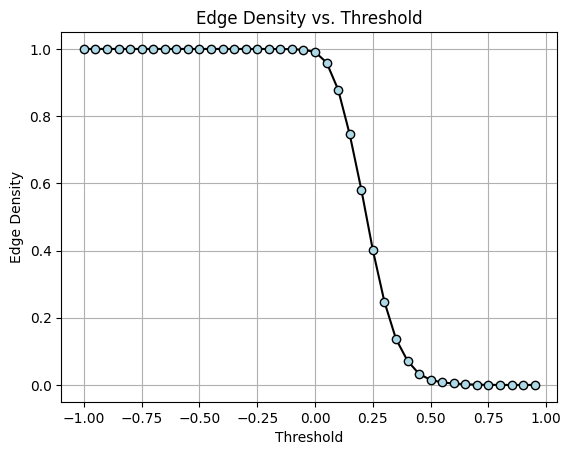

In [3]:

plot_threshold(df)


In [4]:
threshold = 0.45
G = create_network(df, threshold)

Edge density of graph at threshold 0.45 is 0.032663316582914576


In [5]:
print(f"Number of edges of network {G.number_of_edges()}")

Number of edges of network 650


In [6]:
calculate_centrality_measures(G)


Top 10 central nodes based on degree centrality

Node L&TFH: 0.2562814070351759 Centrality = 0.2563
Node FEDERALBNK: 0.22110552763819097 Centrality = 0.2211
Node DLF: 0.22110552763819097 Centrality = 0.2211
Node SBIN: 0.20100502512562815 Centrality = 0.2010
Node IDFCFIRSTB: 0.19095477386934673 Centrality = 0.1910
Node GRASIM: 0.18592964824120603 Centrality = 0.1859
Node CANBK: 0.17587939698492464 Centrality = 0.1759
Node BAJFINANCE: 0.1658291457286432 Centrality = 0.1658
Node LT: 0.16080402010050251 Centrality = 0.1608
Node ICICIBANK: 0.15075376884422112 Centrality = 0.1508

Top 10 central nodes based on betweenness centrality

Node L&TFH: 0.052031248816884125 Centrality = 0.0520
Node DLF: 0.039139732132709014 Centrality = 0.0391
Node GRASIM: 0.03906794724292722 Centrality = 0.0391
Node ADANIENT: 0.03167351911070504 Centrality = 0.0317
Node ULTRACEMCO: 0.030493555681773945 Centrality = 0.0305
Node TATACONSUM: 0.02923695566964976 Centrality = 0.0292
Node SBIN: 0.021776168224450804 Cent

In [7]:
net = Network(height="750px", width="100%", select_menu=True)
net.from_nx(G)

net.force_atlas_2based(
    gravity=-50, 
    central_gravity=0.01, 
    spring_length=100,
    spring_strength=0.08, 
    damping=0.4, 
    overlap=0
)

net.save_graph('out.html')

In [8]:
degrees = G.degree()

max_degree_node = max(degrees, key=lambda x: x[1])
max_degree_node

('L&TFH', 51)

In [9]:
print(nx.average_clustering(G))

0.3994378321165635


In [10]:
print(nx.degree_assortativity_coefficient(G))

0.08083206011058096


In [12]:
c = nx.community.greedy_modularity_communities(G)
for i in c:
    for j in i:
        print(j, end=' ')
    print()

GODREJPROP BANDHANBNK BHARATFORG M&M JSWSTEEL RECLTD TRENT BAJAJ-AUTO PFC CANBK M&MFIN TVSMOTOR MARUTI BAJFINANCE L&TFH DEEPAKNTR INDUSINDBK ASHOKLEY SBIN IDFCFIRSTB BHARTIARTL TITAN GRASIM PRESTIGE GMRINFRA CONCOR INDHOTEL HDFCAMC CHOLAFIN SONACOMS ICICIBANK ABCAPITAL HDFCBANK AXISBANK UPL DLF LT SHRIRAMFIN BOSCHLTD HEROMOTOCO SIEMENS RELIANCE MUTHOOTFIN FEDERALBNK OBEROIRLTY KOTAKBANK SBICARD TATAMOTORS MOTHERSON HAVELLS 
NTPC ONGC NMDC OIL VEDL TORNTPOWER HINDALCO JINDALSTEL TATAPOWER GAIL NHPC SAIL SJVN POWERGRID NLCINDIA IOC JSL COALINDIA BHEL HINDPETRO BPCL 
COLPAL BRITANNIA PIDILITIND MARICO HDFCLIFE BALKRISIND ASIANPAINT BERGEPAINT SBILIFE HINDUNILVR TATACONSUM ULTRACEMCO ICICIGI GODREJCP DABUR ICICIPRULI MRF 
AMBUJACEM ADANIENSOL ATGL DALBHARAT AWL ACC ADANIPORTS SHREECEM ADANIGREEN JIOFIN ADANIPOWER ADANIENT 
INFY LTIM PERSISTENT MPHASIS WIPRO TCS LTTS COFORGE HCLTECH TECHM 
IOB BANKBARODA IDBI PNB UCOBANK CENTRALBK INDIANB UNIONBANK BANKINDIA 
SUNPHARMA AUROPHARMA DRREDDY ZY

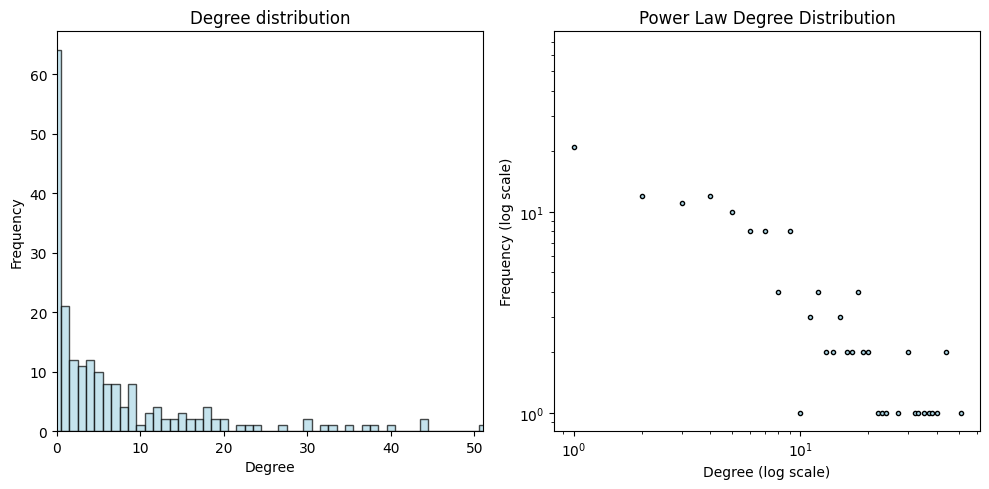

In [26]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

# Plot degree distribution (condensed vertical bar plot)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(degrees, degree_count, color='lightblue', edgecolor='black', alpha=0.7, width=1)
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xlim(0, len(degree_count)-1)  # Limit x-axis to avoid empty space

# Plot log scale degree distribution (scatter plot)
plt.subplot(1, 2, 2)
plt.loglog(degrees, degree_count, 'o', color='lightblue', markeredgecolor='black', markersize=3)  # Use log-log scale
plt.title("Power Law Degree Distribution")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()